In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.975


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.956140350877193


In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Score:", model.score(X_test, y_test))

Score: 0.5757877060324524


In [6]:
# MLP classifier and GridSearchCV

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [7]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=2000, random_state=42))
])

In [9]:
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'lbfgs'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive']
}

In [10]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(max_iter=2000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__solver': ['adam', 'lbfgs']},
             scoring='accuracy')

In [11]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [12]:
#MLP Classifier and GridSearchCV with iris dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [13]:
df = load_iris()
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter = 300, activation='relu', solver='adam')
mlp_clf.fit(X_train_scaled, y_train)
y_pred = mlp_clf.predict(X_test_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.00


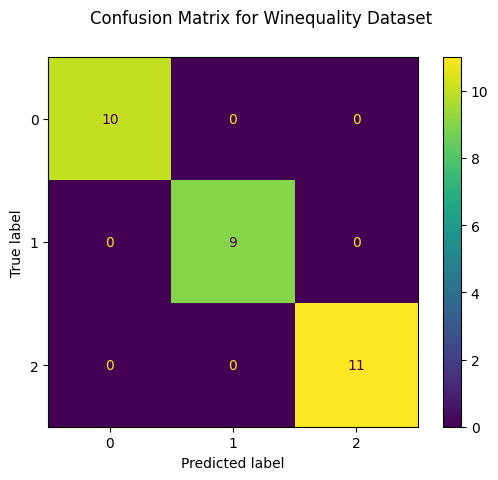

In [16]:
fig = ConfusionMatrixDisplay.from_estimator(mlp_clf, X_test_scaled, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



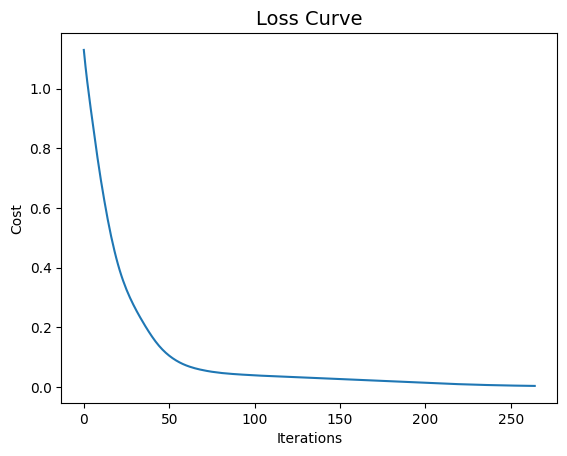

In [18]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [20]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
grid_predictions = grid.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.97
